Data Analytics III
1. Implement Simple Naïve Bayes classification algorithm using
Python/R on iris.csv dataset.
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall on the given dataset

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


In [6]:
data=pd.read_csv('Iris.csv')
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
X=data.drop('Species',axis=1) 
y=data['Species']  
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
naive_bayes_classifier=GaussianNB()
naive_bayes_classifier.fit(X_train,y_train)

GaussianNB()

In [9]:
y_pred=naive_bayes_classifier.predict(X_test)
#create confusion matrix
cm=confusion_matrix(y_test, y_pred)

print(f"Confusion Matrix:\n{cm}")
accuracy=accuracy_score(y_test,y_pred)
error_rate=1-accuracy
precision=precision_score(y_test,y_pred,average='weighted')  
recall=recall_score(y_test,y_pred,average='weighted')  
f1=f1_score(y_test,y_pred,average='weighted') 

print(f"Accuracy: {accuracy}")
print(f"Error Rate: {error_rate}")
print(f"Precision (Weighted): {precision}")
print(f"Recall (Weighted): {recall}")
print(f"F1 Score (Weighted): {f1}")


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy: 1.0
Error Rate: 0.0
Precision (Weighted): 1.0
Recall (Weighted): 1.0
F1 Score (Weighted): 1.0


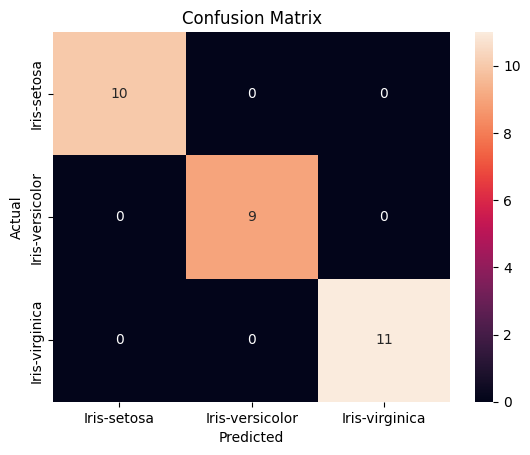

In [11]:
sns.heatmap(cm,annot=True,fmt='d',xticklabels=np.unique(y),yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()